<a href="https://colab.research.google.com/github/Naoki0424/my_document/blob/main/20211026_mnist__classification_with_tensorboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNISTの手書文字分類

## ライブラリインポート

In [ ]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import shutil

import tensorflow as tf
from tensorflow.keras import layers, models, utils, initializers, callbacks
from tensorflow.keras.datasets import mnist

np.random.seed(20211026)
tf.random.set_seed(20211026)

### MNISTのデータセットをダウンロードする

In [ ]:
# 画像データのダウンロード
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)

# 正規化？？
train_images = train_images.reshape((len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape((len(test_images), 784)).astype('float32') / 255

# ワンホットエンコーディング
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

(60000, 28, 28)


## モデルの定義を行う

In [ ]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(28*28, ), kernel_initializer=initializers.TruncatedNormal(), name='hidden'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1024)              803840    
_________________________________________________________________
softmax (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


`kernel_initializer=initializers.TruncatedNormal()`により、ノードの重さの初期値を乱数で取得しています。この設定を行っていない場合、乱数は0で設定されますが、ニューラルネットワークの重さの初期値は一般的には乱数の方が良いとされています。

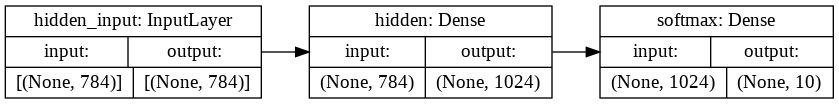

In [ ]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR', expand_nested=True, dpi=96)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

## 学習を行う

In [ ]:
log_dir = '/tmp/log'
shutil.rmtree(log_dir, ignore_errors=True)
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=128, epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2355 - acc: 0.9323 - val_loss: 0.1184 - val_acc: 0.9655
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0905 - acc: 0.9736 - val_loss: 0.0855 - val_acc: 0.9751
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0556 - acc: 0.9833 - val_loss: 0.0778 - val_acc: 0.9741
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0380 - acc: 0.9884 - val_loss: 0.0606 - val_acc: 0.9808
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0276 - acc: 0.9915 - val_loss: 0.0624 - val_acc: 0.9812
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0201 - acc: 0.9941 - val_loss: 0.0670 - val_acc: 0.9795
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0129 - acc: 0.9965 - val_loss: 0.0668 - val_acc: 0.9800
Epoch 8/10
469/469 [==============================] - 8s 17ms/step - 

In [ ]:
!curl -OL https://bin.equinox.io./c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.1M  100 13.1M    0     0  18.2M      0 --:--:-- --:--:-- --:--:-- 18.2M


ngrocのモジュールをダウンロードする。ngrocはグローバルIPアドレスを持たないサーバー上のアプリケーションに対してインターネットからアクセスを利用可能にするサービスです

In [ ]:
!unzip -o ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


ダウンロードしたモジュールを解凍する

In [ ]:
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(log_dir))

TensorBoardをバックグラウンドで実行する。
`get_ipython().system_raw()`はコマンドの実行を行うコードです（？）。

In [ ]:
get_ipython().system_raw('./ngrok http 6006 &')

ngrokバックグラウンドプロセスを起動する。

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://5452-35-237-23-7.ngrok.io


TensorBoard表示のURLを取得する。localhost:4040でNgrokのステータスをJsonで取得してpublicUrlをPrintしている。